<a href="https://colab.research.google.com/github/zqiaohe/100daysofcode/blob/master/CupITcleandata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Данные и библиотеки

In [0]:
import os

In [3]:
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [0]:
import numpy as np
import pandas as pd
%matplotlib inline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from nltk.corpus import stopwords

from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [0]:
train = pd.read_csv('train.csv', encoding='utf', engine='python', index_col=0)
test = pd.read_csv('test.csv', encoding='utf', engine='python', index_col=0)

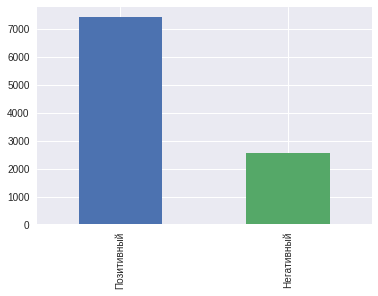

In [6]:
train.score.value_counts().plot.bar()

In [160]:
train.head()

,title,text,score
0,просьба отмена штраф каско,здравствовать 10.06 2016г заключать договор № ...,Позитивный
1,целое работать ипотека,брать ипотека юникор порадовать квалификация в...,Негативный
2,выручать банк уралсиб,знакомство банк начинаться ипотека 2009 год вз...,Позитивный
3,абсолютно неприемлемый ситуация решение,клиент совкомбанк 2017 год февраль 2018 год от...,Позитивный
4,вносить туда,приходить оплачивать кредит ошибочно вносить д...,Позитивный


In [161]:
train['score'][0]

'Позитивный'

In [0]:
def f(x):
  if x=='Позитивный':
    return 1
  else:
    return 0 

In [0]:
train['score'] = [f(x) for x in train['score']]

In [165]:
train.head()

,title,text,score
0,просьба отмена штраф каско,здравствовать 10.06 2016г заключать договор № ...,1
1,целое работать ипотека,брать ипотека юникор порадовать квалификация в...,0
2,выручать банк уралсиб,знакомство банк начинаться ипотека 2009 год вз...,1
3,абсолютно неприемлемый ситуация решение,клиент совкомбанк 2017 год февраль 2018 год от...,1
4,вносить туда,приходить оплачивать кредит ошибочно вносить д...,1


#Новое облако

In [0]:
tf_idf = TfidfVectorizer(ngram_range=(1, 4), stop_words=stopwords.words('russian'), 
                         #tokenizer=None,
                         #preprocessor=None,
                         analyzer='word',
                         max_df=0.8, 
                         min_df=10,
                         #max_features=10000
                        )

In [8]:
%%time
tf_idf_model = tf_idf.fit(np.concatenate([train['text'].values.astype('U'), test['text'].values.astype('U')]))

CPU times: user 20.9 s, sys: 1.36 s, total: 22.3 s
Wall time: 22.3 s


In [9]:
%%time
train_tf_idf_vec = tf_idf_model.transform(train['text'].values.astype('U'))
test_tf_idf_vec = tf_idf_model.transform(test['text'].values.astype('U'))

CPU times: user 5.21 s, sys: 10.8 ms, total: 5.22 s
Wall time: 5.23 s


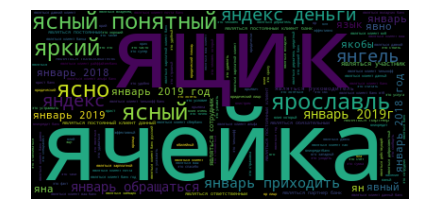

In [10]:
wordcloud = WordCloud().generate_from_frequencies(tf_idf_model.vocabulary_)

# Display the generated image:
plt.figure() 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.margins(x=0, y=0) 
plt.tight_layout()
plt.show() 

#Logregression

In [0]:
lm = LogisticRegression(#solver='newton-cg', 
                        #n_jobs=-1,
                        #solver='lbfgs',
                        penalty='l2',
                        #tol=0.000000001,
                        random_state=42,
                        C=10, 
                        max_iter=100000)

In [0]:
lm_params = {'penalty':['l1', 'l2'],
             'C':[0.001, 0.01, 0.1, 1, 2, 5, 10, 20, 100],
             #'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
             #'tol' : [10, 1, 0.1, 0.01, 0.001, 0.0001, 0.0001]
    
    
}
lm_search = GridSearchCV(estimator=lm, 
                         param_grid=lm_params, 
                         scoring ='roc_auc', 
                         cv=StratifiedKFold(10), 
                         n_jobs=-1,
                         verbose=1)

In [20]:
%%time
lm_search_fitted = lm_search.fit(X=train_tf_idf_vec, y=pd.factorize(train.score)[0])

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.1min finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


CPU times: user 1.02 s, sys: 212 ms, total: 1.23 s
Wall time: 1min 3s


In [21]:
lm_search_fitted.best_estimator_

LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [22]:
pred_scores = cross_val_score(estimator=lm_search_fitted.best_estimator_, X=train_tf_idf_vec, y=pd.factorize(train.score)[0],
                scoring='roc_auc',  
                cv=10, #stratified by default
                n_jobs=-1)
display(np.mean(pred_scores))

0.9250056669810267

In [0]:
predicts = lm_search_fitted.best_estimator_.predict_proba(test_tf_idf_vec)[:, 0]

In [0]:
sub = pd.DataFrame({'index': range(0, len(predicts)),
                    'score':predicts})
sub.to_csv('stemdatasetsubmissionlogreg.csv', index=False)

#Naive Bayes

##Бернулли

In [0]:
from sklearn.naive_bayes import BernoulliNB

In [0]:
modelnb = BernoulliNB()

In [0]:
nb_params = {'alpha': [0.0, 0.000012,0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0],
             'fit_prior':[True, False],
             'binarize':[None, 0.0,0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]             
            }

In [0]:
nb_search = GridSearchCV(estimator=modelnb, param_grid=[alphas], cv=5, scoring='roc_auc', refit=True)

In [89]:
%%time
nb_search_fitted = nb_search.fit(X=train_tf_idf_vec, y=pd.factorize(train.score)[0])

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


CPU times: user 2.17 s, sys: 50 ms, total: 2.22 s
Wall time: 2.22 s


In [90]:
nb_search_fitted.best_estimator_

BernoulliNB(alpha=0.0001, binarize=0.0, class_prior=None, fit_prior=True)

In [92]:
pred_scores = cross_val_score(estimator=nb_search_fitted.best_estimator_, X=train_tf_idf_vec, y=pd.factorize(train.score)[0],
                scoring='roc_auc',  
                cv=10, #stratified by default
                n_jobs=-1)
display(np.mean(pred_scores))

0.8943206762490237

In [0]:
predicts = nb_search_fitted.best_estimator_.predict_proba(test_tf_idf_vec)[:, 0]

In [0]:
sub = pd.DataFrame({'index': range(0, len(predicts)),
                    'score':predicts})
sub.to_csv('bayes.csv', index=False)

#Word2Vec


In [79]:
!pip install --upgrade gensim

    100% |████████████████████████████████| 24.2MB 1.2MB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [102]:
tf_idf_model

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.8, max_features=None, min_df=10,
        ngram_range=(1, 4), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', '...гда', 'лучше', 'чуть', 'том', 'нельзя', 'такой', 'им', 'более', 'всегда', 'конечно', 'всю', 'между'],
        strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [0]:
train_dict = dict(zip(tf_idf_model.get_feature_names(), tf_idf_model.idf_)) #создали словарь

In [125]:
train['text'].head()

0    здравствовать 10.06 2016г заключать договор № ...
1    брать ипотека юникор порадовать квалификация в...
2    знакомство банк начинаться ипотека 2009 год вз...
3    клиент совкомбанк 2017 год февраль 2018 год от...
4    приходить оплачивать кредит ошибочно вносить д...
Name: text, dtype: object

In [0]:
train['text'] = train['text'].str.split(' ')
test['text'] = test['text'].str.split(' ')

In [0]:
train['title'] = train['title'] .str.split(' ')
test['title'] = test['title'].str.split(' ')

In [142]:
train['title'].describe()

count              9994
unique             7146
top       благодарность
freq                637
Name: title, dtype: object

In [0]:
import gensim

In [0]:
from gensim.corpora import Dictionary
from gensim.models.tfidfmodel import TfidfModel
from gensim.matutils import sparse2full
from gensim.models import word2vec

In [0]:
model = word2vec.Word2Vec(train['text'].values.astype('U'), size=300, window=3, workers=4)

In [146]:
model

In [149]:
w2v = dict(zip(model.wv.index2word, model.wv.syn0))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  """Entry point for launching an IPython kernel.


In [151]:
data_mean=mean_vectorizer(w2v).fit(train['text'].values.astype('U')).transform(train['text'].values.astype('U'))
data_mean.shape

(10000, 300)

In [0]:
class mean_vectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        self.dim = len(next(iter(w2v.values())))

    def fit(self, X):
        return self 

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec] 
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

In [166]:
def split(train,y,ratio):
    idx = round(train.shape[0] * ratio)
    return train[:idx, :], train[idx:, :], y[:idx], y[idx:]
y = train['score']
Xtr, Xval, ytr, yval = split(data_mean, y,0.8)
Xtr.shape,Xval.shape,ytr.mean(),yval.mean()

((8000, 300), (2000, 300), 0.741375, 0.747)

In [178]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
model = Ridge(alpha = 1,random_state=7)
model.fit(Xtr, ytr)
train_preds = model.predict(Xtr)
valid_preds = model.predict(Xval)
ymed = np.ones(len(valid_preds))*ytr.median()
print('Ошибка на трейне',mean_squared_error(ytr, train_preds))
print('Ошибка на валидации',mean_squared_error(yval, valid_preds))
print('Ошибка на валидации предсказываем медиану',mean_squared_error(yval, ymed))

Ошибка на трейне 0.1548959915941886
Ошибка на валидации 0.1588407167900331
Ошибка на валидации предсказываем медиану 0.253


#keras

In [168]:
# подключим библиотеки keras 
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Input
from keras.preprocessing.text import Tokenizer
from keras import regularizers

Using TensorFlow backend.


In [169]:
model = Sequential()
model.add(Dense(128, input_dim=(Xtr.shape[1])))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['binary_accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
from sklearn.metrics import roc_auc_score

In [0]:
history = model.fit(Xtr, ytr,
                    batch_size=60,
                    epochs=100,
                    validation_data=(Xval, yval),
                    class_weight='auto',
                    verbose=0)

In [177]:
classes = model.predict(Xval, batch_size=128)
roc_auc_score(yval, classes)

0.8046824981083756

In [0]:
# подключим библиотеки keras 
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Input
from keras.preprocessing.text import Tokenizer
from keras import regularizers
from keras.wrappers.scikit_learn import KerasRegressor

In [0]:
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten
from keras.layers import UpSampling2D
from keras.layers import concatenate
from keras.layers import Concatenate
from keras.layers import Reshape

In [339]:
Xval.shape

(2000, 300)

In [0]:
def baseline_model():
    inputs = Input((2000, 300,1))
    model.add(Conv2d(2000, 300, padding='VALID'))
    model.add(Dropout(0.5))
    model.add(Dense(1, kernel_initializer='normal'))

    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model
estimator = KerasRegressor(build_fn=baseline_model,epochs=20, nb_epoch=20, batch_size=64,validation_data=(Xval, yval), verbose=2)

In [0]:

estimator = KerasRegressor(build_fn=baseline_model,epochs=3000, nb_epoch=100, batch_size=164,validation_data=(Xval, yval), verbose=2)

In [347]:
estimator.fit(Xtr, ytr)

AttributeError: ignored

In [338]:
sub = estimator.predict(Xval, batch_size=128)
roc_auc_score(yval,sub)

0.7933909551248473

In [0]:
import keras
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Activation
from keras.layers import Embedding, Conv1D, SpatialDropout1D, GlobalMaxPool1D
from keras.callbacks import ModelCheckpoint
import os
import sklearn.metrics
from sklearn.metrics import roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt